In [2]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.sandbox.stats.multicomp import multipletests
from statsmodels.stats.multitest import fdrcorrection
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('GSE44772_series_matrix.txt', sep='\t')
patient = df.loc[44:52]

In [3]:
patient.columns = patient.iloc[0]

In [12]:
CR_patient = patient[[patient.columns[0]] + [i for i in patient.columns if "CR" in i]]

In [4]:
PFC_patient =  patient[[patient.columns[0]] + [i for i in patient.columns if "PFC" in i]]
PFC_patient_data = PFC_patient.values 
index1 = list(PFC_patient.keys()) 
PFC_patient_data = list(map(list, zip(*PFC_patient_data)))
PFC_patient_data = pd.DataFrame(PFC_patient_data, index=index1)
PFC_patient_data.columns = ["Patient ID", "Organism", "Disease State","Age","Gender","PMI","pH","RIN","PRES"]
PFC_patient_data = PFC_patient_data.iloc[1: , :]
PFC_patient_data

,Patient ID,Organism,Disease State,Age,Gender,PMI,pH,RIN,PRES
1_PFC,1_PFC,Homo sapiens,disease: A,age: 88,gender: M,pmi: 8.8,ph: 6.409,rin: 7.7,pres: LNV
2_PFC,2_PFC,Homo sapiens,disease: A,age: 90,gender: F,pmi: 12.6,ph: 5.644,rin: 7.2,pres: LNV
3_PFC,3_PFC,Homo sapiens,disease: N,age: 64,gender: M,pmi: 25.8,ph: 6.652,rin: 7,pres: LNV
4_PFC,4_PFC,Homo sapiens,disease: N,age: 95,gender: F,pmi: 7.05,ph: 6.378,rin: 6.9,pres: LNV
5_PFC,5_PFC,Homo sapiens,disease: A,age: 90,gender: F,pmi: 9.25,ph: 6.05,rin: 7,pres: LNV
...,...,...,...,...,...,...,...,...,...
226_PFC,226_PFC,Homo sapiens,disease: N,age: 55,gender: F,pmi: 21.83,ph: 6.91,rin: 7.3,pres: LNV
227_PFC,227_PFC,Homo sapiens,disease: A,age: 76,gender: F,pmi: 25.67,ph: 6.41,rin: 7,pres: LNV
228_PFC,228_PFC,Homo sapiens,disease: A,age: 80,gender: F,pmi: 17.17,ph: 7.34,rin: 6.7,pres: Dry-Ice
229_PFC,229_PFC,Homo sapiens,disease: A,age: 93,gender: F,pmi: 14.07,ph: 6.67,rin: 6.7,pres: LNV


In [7]:
for col in PFC_patient_data.columns:
    PFC_patient_data[col] = PFC_patient_data[col].apply(lambda x:x.split(":")[-1])
    PFC_patient_data[col] = PFC_patient_data[col].apply(lambda x:x.split("_")[0])
PFC_patient_data = PFC_patient_data.astype({"Age": int, "PMI": float, "pH": float, "RIN": float})

In [16]:
PFC_patient_data.describe(include='all')

,Patient ID,Organism,Disease State,Age,Gender,PMI,pH,RIN,PRES
count,230,230,230,230.000000,230,230.000000,230.000000,230.000000,230
unique,230,1,2,NaN,2,NaN,NaN,NaN,2
top,1,Homo sapiens,A,NaN,M,NaN,NaN,NaN,LNV
freq,1,230,129,NaN,144,NaN,NaN,NaN,195
mean,NaN,NaN,NaN,72.230435,NaN,17.520304,6.449909,7.203913,NaN
std,NaN,NaN,NaN,13.414257,NaN,8.053650,0.342586,0.527772,NaN
min,NaN,NaN,NaN,22.000000,NaN,1.300000,5.406000,5.700000,NaN
25%,NaN,NaN,NaN,61.000000,NaN,11.005000,6.230750,6.900000,NaN
50%,NaN,NaN,NaN,73.000000,NaN,18.200000,6.490500,7.200000,NaN
75%,NaN,NaN,NaN,83.000000,NaN,23.400000,6.710000,7.500000,NaN


<AxesSubplot:title={'center':'Gender of patients'}>

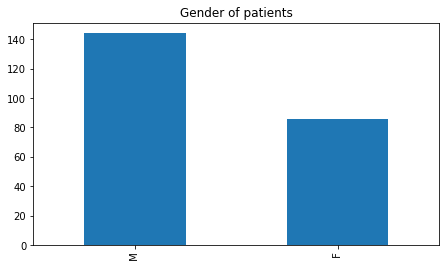

In [17]:
plt.subplot(221)

PFC_patient_data['Gender'].value_counts().plot(kind='bar', title='Gender of patients', figsize=(16,9))

<AxesSubplot:title={'center':'Disease state of patients'}>

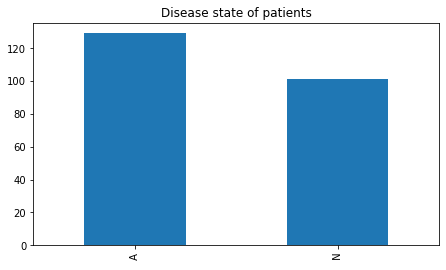

In [18]:
plt.subplot(221)
PFC_patient_data['Disease State'].value_counts().plot(kind='bar', title='Disease state of patients', figsize=(16,9))

<AxesSubplot:xlabel='Age', ylabel='Density'>

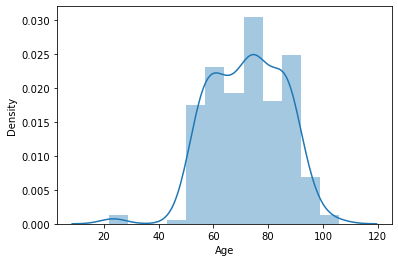

In [19]:
sns.distplot(PFC_patient_data['Age'])

<AxesSubplot:xlabel='Disease State'>

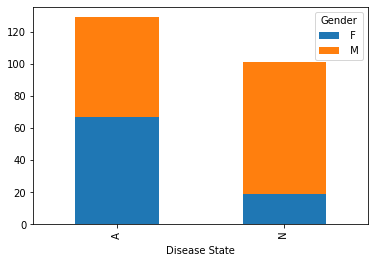

In [20]:
PFC_patient_data.groupby(['Disease State', 'Gender']).size().unstack().plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='Age', ylabel='Disease State'>

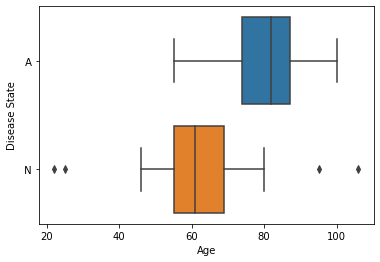

In [21]:
sns.boxplot(x = 'Age', y = 'Disease State', data = PFC_patient_data)

<AxesSubplot:>

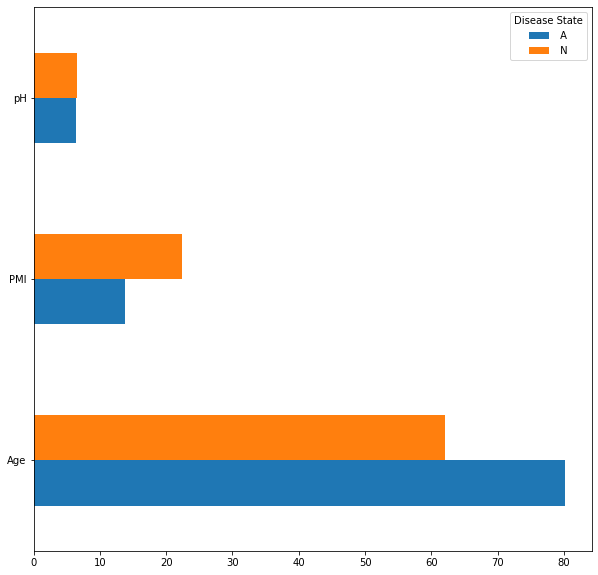

In [22]:
PFC_patient_data.groupby('Disease State')[['Age', 'PMI',"pH"]].mean().T.plot(kind='barh', figsize=(10,10))

In [23]:
PFC_patient_data.to_csv('PFC_PatientCharateristics.csv', index = None)

In [24]:
VC_patient =  patient[[patient.columns[0]] + [i for i in patient.columns if "VC" in i]]
#VC_patient

In [5]:
temp = df.iloc[26:, :]
data = temp.drop(labels = range(27,80), axis=0)
data.columns = data.iloc[0]

In [27]:
CR_data = data[[data.columns[0]] + [i for i in data.columns if "CR" in i]]
#CR_data

In [6]:
PFC_data = data[[data.columns[0]] + [i for i in data.columns if "PFC" in i]]
PFC_expression_data = PFC_data.values 
index1 = list(PFC_data.keys()) 
PFC_expression_data = list(map(list, zip(*PFC_expression_data)))
PFC_expression_data = pd.DataFrame(PFC_expression_data, index=index1)
PFC_expression_data

,0,1,2,3,4,5,6,7,8,9,...,39273,39274,39275,39276,39277,39278,39279,39280,39281,39282
!Sample_title,!Sample_title,ID_REF,10019475365,10019481149,10019495284,10019687586,10019713746,10019799479,10019809115,10019874890,...,10033669040,10033669041,10033669042,10033669043,10033669045,10033669046,10033669047,10033669048,10033669049,!series_matrix_table_end
1_PFC,1_PFC,GSM1090501,2.76E-02,-2.36E-02,-5.87E-02,3.29E-02,3.25E-02,1.63E-02,3.90E-03,2.70E-02,...,0.0457,0.0319,0.0278,-0.0108,-0.22,-0.00102,-0.0429,-0.0728,0.155,NaN
2_PFC,2_PFC,GSM1090502,-2.05E-02,3.44E-03,7.27E-02,-3.31E-02,-1.03E-02,-2.93E-02,-1.97E-02,2.31E-02,...,0.0863,-0.0167,0.0118,-0.027,-0.0655,0.0317,-0.0379,-0.0463,0.204,NaN
3_PFC,3_PFC,GSM1090503,1.12E-01,4.37E-02,-1.41E-01,1.59E-01,1.64E-01,8.83E-02,9.67E-02,8.71E-02,...,0.107,0.0234,0.0992,0.0139,-0.21,0.0655,-0.123,0.0527,0.204,NaN
4_PFC,4_PFC,GSM1090504,-8.16E-02,-3.23E-03,3.89E-02,2.79E-02,-8.84E-02,-5.32E-02,3.55E-02,-3.40E-03,...,0.0208,0.00285,-0.0499,0.0836,-0.223,-0.00836,-0.155,0.0255,0.288,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226_PFC,226_PFC,GSM1090726,7.40E-02,1.72E-02,-1.82E-01,-7.49E-02,5.79E-02,1.51E-02,4.28E-02,5.73E-02,...,0.0373,-0.00521,0.116,-0.0709,-0.275,0.122,-0.0735,-0.0204,0.0804,NaN
227_PFC,227_PFC,GSM1090727,7.66E-02,1.64E-02,-2.14E-01,-2.13E-01,-2.60E-02,2.06E-02,1.84E-01,5.15E-02,...,0.117,0.00434,0.12,0.057,-0.0513,-0.174,-0.235,-0.0533,-0.0354,NaN
228_PFC,228_PFC,GSM1090728,3.26E-02,2.96E-02,-8.04E-02,-1.01E-01,1.78E-01,1.10E-01,3.54E-02,8.99E-02,...,0.164,0.107,0.147,-0.0705,-0.0237,0.204,0.0736,-0.0658,0.128,NaN
229_PFC,229_PFC,GSM1090729,2.28E-01,7.45E-02,-1.90E-01,-9.48E-02,2.32E-01,2.17E-01,7.65E-02,1.94E-01,...,0.103,0.107,0.166,-0.0517,-0.401,0.208,0.0347,-0.0681,0.192,NaN


In [7]:
PFC_expression_data.mean(axis = 1,skipna=True)

!Sample_title    1.002546e+10
1_PFC            3.028320e-03
2_PFC            3.280657e-03
3_PFC            2.507694e-03
4_PFC            2.119517e-03
                     ...     
226_PFC          4.260911e-03
227_PFC          3.538394e-03
228_PFC          7.620769e-03
229_PFC          5.909271e-03
230_PFC          5.117460e-03
Length: 231, dtype: float64

In [21]:
PFC_expression_data.mean(axis=1,skipna=True)

!Sample_title    1.002546e+10
1_PFC            3.028320e-03
2_PFC            3.280657e-03
3_PFC            2.507694e-03
4_PFC            2.119517e-03
                     ...     
226_PFC          4.260911e-03
227_PFC          3.538394e-03
228_PFC          7.620769e-03
229_PFC          5.909271e-03
230_PFC          5.117460e-03
Length: 231, dtype: float64

In [99]:
PFC_data.to_csv('PFC_Expression.csv', index=None)

In [96]:
VC_data = data[[data.columns[0]] + [i for i in data.columns if "VC" in i]]
VC_data

In [3]:
raw_annotation =  pd.read_csv(r'GPL4372.annot.txt',  sep = '\t', skiprows = 26)
raw_annotation.to_csv("GPL4372_annotation.csv")
raw_annotation

,,,,,,,,,,,,,,,,,,,,!platform_table_begin
ID,Gene title,Gene symbol,Gene ID,UniGene title,UniGene symbol,UniGene ID,Nucleotide Title,GI,GenBank Accession,Platform_CLONEID,Platform_ORF,Platform_SPOTID,Chromosome location,Chromosome annotation,GO:Function,GO:Process,GO:Component,GO:Function ID,GO:Process ID,GO:Component ID
10025930146,NaN,NaN,NaN,Transcribed locus,NaN,Hs.570225,"om25h03.s1 Soares_NFL_T_GBC_S1 Homo sapiens cDNA clone IMAGE:1542101 3-, mRNA sequence",3075810,AA926913,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10025930335,"xeroderma pigmentosum, complementation group A",XPA,7507,"Xeroderma pigmentosum, complementation group A",XPA,Hs.654364,"Homo sapiens cDNA FLJ11599 fis, clone HEMBA1003879",10432891,AK021661,NaN,NaN,NaN,9q22.3,"Chromosome 9, NC_000009.10 (99477012..99499460, complement)",damaged DNA binding///metal ion binding///nucleotide binding///protein binding///protein homodimerization activity///zinc ion binding,nucleotide-excision repair,nucleus,GO:0003684///GO:0046872///GO:0000166///GO:0005515///GO:0042803///GO:0008270,GO:0006289,GO:0005634
10025913794,hypothetical gene supported by NM_194304,LOC439911,439911,NaN,NaN,NaN,Homo sapiens mRNA; cDNA DKFZp313L1514 (from clone DKFZp313L1514),21732601,AL832060,NaN,NaN,NaN,10q11.21,Chromosome 10,NaN,NaN,NaN,NaN,NaN,NaN
10023807248,"solute carrier family 35 (UDP-N-acetylglucosamine (UDP-GlcNAc) transporter), member A3",SLC35A3,23443,NaN,NaN,NaN,"Homo sapiens solute carrier family 35 (UDP-N-acetylglucosamine (UDP-GlcNAc) transporter), member A3 (SLC35A3), mRNA",6912667,NM_012243,NaN,SLC35A3,NaN,1p21,"Chromosome 1, NC_000001.9 (100208128..100261594)",UDP-N-acetylglucosamine transmembrane transporter activity///nucleotide-sugar transmembrane transporter activity///sugar:hydrogen ion symporter activity,UDP-N-acetylglucosamine metabolic process///UDP-N-acetylglucosamine transport///nucleotide-sugar transport,Golgi apparatus///Golgi membrane///integral to membrane///membrane,GO:0005462///GO:0005338///GO:0005351,GO:0006047///GO:0015788///GO:0015780,GO:0005794///GO:0000139///GO:0016021///GO:0016020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10023840430,unc-93 homolog B1 (C. elegans),UNC93B1,81622,NaN,NaN,NaN,"Homo sapiens unc-93 homolog B1 (C. elegans) (UNC93B1), mRNA",45580708.0,NM_030930,NaN,UNC93B1,NaN,11q13,"Chromosome 11, NC_000011.8 (67515151..67528169, complement)",NaN,NaN,integral to membrane///membrane,NaN,NaN,GO:0016021///GO:0016020
10023812706,NaN,NaN,NaN,NaN,NaN,NaN,"za32b03.s1 Soares fetal liver spleen 1NFLS Homo sapiens cDNA clone IMAGE:294221 3-, mRNA sequence",1227260.0,N70680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10023842346,zinc finger protein 483,ZNF483,158399,NaN,NaN,NaN,Homo sapiens mRNA for KIAA1962 protein,18916805.0,AB075842,NaN,ZNF483,NaN,9q31.3,"Chromosome 9, NC_000009.10 (113327260..113379945)",metal ion binding///nucleic acid binding///transcription factor activity///zinc ion binding,"regulation of transcription, DNA-dependent///transcription",intracellular///nucleus,GO:0046872///GO:0003676///GO:0003700///GO:0008270,GO:0006355///GO:0006350,GO:0005622///GO:0005634
10031920891,"olfactory receptor, family 51, subfamily S, member 1",OR51S1,119692,NaN,NaN,NaN,"Homo sapiens olfactory receptor, family 51, subfamily S, member 1 (OR51S1), mRNA",52317153.0,NM_001004758,NaN,OR51S1,NaN,11p15.4,"Chromosome 11, NC_000011.8 (4826043..4827014, complement)",olfactory receptor activity///receptor activity,G-protein coupled receptor protein signaling pathway///response to stimulus///sensory perception of smell///signal transduction,integral to membrane///plasma membrane,GO:0004984///GO:0004872,GO:0007186///GO:0050896///GO:0007608///GO:0007165,GO:0016021///GO:0005886


In [15]:
groupDiseaseState =  pd.read_csv('PFC_Expression_with_DiseaseState.csv', sep=',')
groupDiseaseState = groupDiseaseState.T
groupDiseaseState.columns = groupDiseaseState.iloc[0]
groupDiseaseState['Disease_State'] = groupDiseaseState['Disease_State'].str.strip()
groupDiseaseState

!Sample_title,Disease_State,ID_REF,10019475365,10019481149,10019495284,10019687586,10019713746,10019799479,10019809115,10019874890,...,10033669040,10033669041,10033669042,10033669043,10033669045,10033669046,10033669047,10033669048,10033669049,!series_matrix_table_end
!Sample_title,Disease_State,ID_REF,10019475365,10019481149,10019495284,10019687586,10019713746,10019799479,10019809115,10019874890,...,10033669040,10033669041,10033669042,10033669043,10033669045,10033669046,10033669047,10033669048,10033669049,!series_matrix_table_end
1_PFC,A,GSM1090501,2.76E-02,-2.36E-02,-5.87E-02,3.29E-02,3.25E-02,1.63E-02,3.90E-03,2.70E-02,...,0.0457,0.0319,0.0278,-0.0108,-0.22,-0.00102,-0.0429,-0.0728,0.155,NaN
2_PFC,A,GSM1090502,-2.05E-02,3.44E-03,7.27E-02,-3.31E-02,-1.03E-02,-2.93E-02,-1.97E-02,2.31E-02,...,0.0863,-0.0167,0.0118,-0.027,-0.0655,0.0317,-0.0379,-0.0463,0.204,NaN
3_PFC,N,GSM1090503,1.12E-01,4.37E-02,-1.41E-01,1.59E-01,1.64E-01,8.83E-02,9.67E-02,8.71E-02,...,0.107,0.0234,0.0992,0.0139,-0.21,0.0655,-0.123,0.0527,0.204,NaN
4_PFC,N,GSM1090504,-8.16E-02,-3.23E-03,3.89E-02,2.79E-02,-8.84E-02,-5.32E-02,3.55E-02,-3.40E-03,...,0.0208,0.00285,-0.0499,0.0836,-0.223,-0.00836,-0.155,0.0255,0.288,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226_PFC,N,GSM1090726,7.40E-02,1.72E-02,-1.82E-01,-7.49E-02,5.79E-02,1.51E-02,4.28E-02,5.73E-02,...,0.0373,-0.00521,0.116,-0.0709,-0.275,0.122,-0.0735,-0.0204,0.0804,NaN
227_PFC,A,GSM1090727,7.66E-02,1.64E-02,-2.14E-01,-2.13E-01,-2.60E-02,2.06E-02,1.84E-01,5.15E-02,...,0.117,0.00434,0.12,0.057,-0.0513,-0.174,-0.235,-0.0533,-0.0354,NaN
228_PFC,A,GSM1090728,3.26E-02,2.96E-02,-8.04E-02,-1.01E-01,1.78E-01,1.10E-01,3.54E-02,8.99E-02,...,0.164,0.107,0.147,-0.0705,-0.0237,0.204,0.0736,-0.0658,0.128,NaN
229_PFC,A,GSM1090729,2.28E-01,7.45E-02,-1.90E-01,-9.48E-02,2.32E-01,2.17E-01,7.65E-02,1.94E-01,...,0.103,0.107,0.166,-0.0517,-0.401,0.208,0.0347,-0.0681,0.192,NaN


In [13]:
Disease = groupDiseaseState.loc[groupDiseaseState['Disease_State'] == 'A']
Control = groupDiseaseState.loc[groupDiseaseState['Disease_State'] == 'N']
Disease = Disease.iloc[0:, 2:]
Control = Control.iloc[0:, 2:]
Disease_mean = Disease.mean(axis=0)
Control_mean = Control.mean(axis=0)
total = groupDiseaseState.iloc[0:, 2:]
total = total.T

In [37]:
total.index.names=['ID']
total.iloc[0:,1:]
#total['ID'] = pd.to_numeric(total['ID'])

,1_PFC,2_PFC,3_PFC,4_PFC,5_PFC,6_PFC,7_PFC,8_PFC,9_PFC,10_PFC,...,221_PFC,222_PFC,223_PFC,224_PFC,225_PFC,226_PFC,227_PFC,228_PFC,229_PFC,230_PFC
ID,,,,,,,,,,,,,,,,,,,,,
10019475365,2.76E-02,-2.05E-02,1.12E-01,-8.16E-02,-5.17E-02,-4.66E-02,-3.14E-02,1.12E-01,2.83E-02,-3.31E-02,...,1.83E-02,4.15E-02,1.22E-01,-3.49E-02,1.15E-01,7.40E-02,7.66E-02,3.26E-02,2.28E-01,1.32E-01
10019481149,-2.36E-02,3.44E-03,4.37E-02,-3.23E-03,-6.41E-02,-7.18E-02,-1.82E-02,-5.17E-02,1.75E-02,-7.57E-02,...,1.43E-02,1.54E-02,1.06E-02,-1.01E-02,9.81E-02,1.72E-02,1.64E-02,2.96E-02,7.45E-02,6.28E-02
10019495284,-5.87E-02,7.27E-02,-1.41E-01,3.89E-02,-5.10E-02,-7.50E-02,-2.54E-01,-9.07E-02,-9.97E-02,-3.61E-02,...,-1.73E-01,3.36E-02,-2.59E-01,-1.60E-01,-1.91E-01,-1.82E-01,-2.14E-01,-8.04E-02,-1.90E-01,1.91E-03
10019687586,3.29E-02,-3.31E-02,1.59E-01,2.79E-02,-4.92E-02,7.25E-02,-2.81E-02,1.27E-01,4.20E-02,-3.95E-01,...,5.08E-03,-1.18E-02,-1.45E-01,-6.83E-02,-7.57E-02,-7.49E-02,-2.13E-01,-1.01E-01,-9.48E-02,5.60E-03
10019713746,3.25E-02,-1.03E-02,1.64E-01,-8.84E-02,6.31E-02,-5.56E-02,2.09E-02,1.27E-01,1.15E-02,5.11E-03,...,3.01E-02,2.70E-02,8.56E-02,-9.84E-03,4.57E-02,5.79E-02,-2.60E-02,1.78E-01,2.32E-01,4.97E-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10033669046,-0.00102,0.0317,0.0655,-0.00836,0.0285,-0.124,0.043,-0.325,0.0813,-0.0554,...,0.0953,0.147,0.143,0.0716,0.133,0.122,-0.174,0.204,0.208,0.11
10033669047,-0.0429,-0.0379,-0.123,-0.155,-0.089,0.186,-0.0883,0.22,-0.0529,-0.0649,...,-0.0923,-0.125,-0.00869,-0.181,0.02,-0.0735,-0.235,0.0736,0.0347,-0.0295
10033669048,-0.0728,-0.0463,0.0527,0.0255,0.0103,-0.0736,-0.0295,0.0559,0.0486,-0.0915,...,-0.0325,-0.0615,-0.00987,-0.0629,0.00143,-0.0204,-0.0533,-0.0658,-0.0681,-0.0349


In [6]:
t_test = {}
for i in Disease:
    t_test[i] = stats.ttest_ind(Disease[i].astype(float), Control[i].astype(float), equal_var=True)
t_test = pd.DataFrame.from_dict(t_test).T
t_test.columns = ['t_statistics', 'p_value']
t_test = t_test.dropna()
t_test

,t_statistics,p_value
10019475365,-0.782671,4.346324e-01
10019481149,-6.046056,6.011709e-09
10019495284,0.451791,6.518492e-01
10019687586,-4.128026,5.133770e-05
10019713746,2.159515,3.185366e-02
...,...,...
10033669045,8.746966,4.909882e-16
10033669046,-4.596766,7.108695e-06
10033669047,9.051955,6.390684e-17
10033669048,-4.171502,4.303000e-05


In [63]:
expression_with_header = groupDiseaseState
expression_with_header=expression_with_header.iloc[1:, 0:]
expression_with_header.index.name = 'ID'
#expression_with_header.index = pd.to_numeric(expression_with_header.index)
expression_with_header

ID,Disease_State,ID_REF,10019475365,10019481149,10019495284,10019687586,10019713746,10019799479,10019809115,10019874890,...,10033669040,10033669041,10033669042,10033669043,10033669045,10033669046,10033669047,10033669048,10033669049,!series_matrix_table_end
ID,,,,,,,,,,,,,,,,,,,,,
1_PFC,A,GSM1090501,2.76E-02,-2.36E-02,-5.87E-02,3.29E-02,3.25E-02,1.63E-02,3.90E-03,2.70E-02,...,0.0457,0.0319,0.0278,-0.0108,-0.22,-0.00102,-0.0429,-0.0728,0.155,NaN
2_PFC,A,GSM1090502,-2.05E-02,3.44E-03,7.27E-02,-3.31E-02,-1.03E-02,-2.93E-02,-1.97E-02,2.31E-02,...,0.0863,-0.0167,0.0118,-0.027,-0.0655,0.0317,-0.0379,-0.0463,0.204,NaN
3_PFC,N,GSM1090503,1.12E-01,4.37E-02,-1.41E-01,1.59E-01,1.64E-01,8.83E-02,9.67E-02,8.71E-02,...,0.107,0.0234,0.0992,0.0139,-0.21,0.0655,-0.123,0.0527,0.204,NaN
4_PFC,N,GSM1090504,-8.16E-02,-3.23E-03,3.89E-02,2.79E-02,-8.84E-02,-5.32E-02,3.55E-02,-3.40E-03,...,0.0208,0.00285,-0.0499,0.0836,-0.223,-0.00836,-0.155,0.0255,0.288,NaN
5_PFC,A,GSM1090505,-5.17E-02,-6.41E-02,-5.10E-02,-4.92E-02,6.31E-02,2.05E-02,-3.85E-02,3.55E-02,...,0.0489,-0.129,0.0418,-0.0367,-0.0852,0.0285,-0.089,0.0103,0.153,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226_PFC,N,GSM1090726,7.40E-02,1.72E-02,-1.82E-01,-7.49E-02,5.79E-02,1.51E-02,4.28E-02,5.73E-02,...,0.0373,-0.00521,0.116,-0.0709,-0.275,0.122,-0.0735,-0.0204,0.0804,NaN
227_PFC,A,GSM1090727,7.66E-02,1.64E-02,-2.14E-01,-2.13E-01,-2.60E-02,2.06E-02,1.84E-01,5.15E-02,...,0.117,0.00434,0.12,0.057,-0.0513,-0.174,-0.235,-0.0533,-0.0354,NaN
228_PFC,A,GSM1090728,3.26E-02,2.96E-02,-8.04E-02,-1.01E-01,1.78E-01,1.10E-01,3.54E-02,8.99E-02,...,0.164,0.107,0.147,-0.0705,-0.0237,0.204,0.0736,-0.0658,0.128,NaN


In [86]:
p_adjusted = multipletests(pvals=t_test["p_value"], alpha=0.05, method='bonferroni',is_sorted = False, returnsorted = False)
t_test['Adjusted_p'] = p_adjusted[1]
t_test = t_test.loc[(t_test["Adjusted_p"] < 0.05)]
t_test.index.name = 'ID'
t_test.index = pd.to_numeric(t_test.index)
expression_with_pvalues =pd.merge(left = total, right=t_test,left_on='ID',right_on = 'ID', how = 'inner')
expression_with_pvalues.to_csv('GeneExpression_with_SignificantPvalues.csv')
expression_with_pvalues=expression_with_pvalues.T[1:]
expression_with_pvalues
#expression_with_pvalues= expression_with_pvalues.merge(expression_with_header['Disease_State'], how = 'left',on='ID')

ID,10023815102,10023815105,10023815110,10023815126,10023815131,10023815132,10023815136,10023815139,10023815142,10023815147,...,10025935037,10025935045,10025935055,10025935057,10025935071,10025935080,10025935081,10025935087,10025935093,10025935102
1_PFC,-0.0132,-0.0961,0.00625,0.0726,-0.0491,0.0392,0.0195,0.0578,0.0126,0.0276,...,-0.0526,-0.0376,-0.00557,0.0851,-0.00469,-0.0872,-0.0625,-0.0245,0.0424,0.0556
2_PFC,-0.175,-0.029,0.299,0.0772,-0.111,-0.0356,0.131,0.0607,-0.0664,-0.0666,...,-0.0161,0.0237,-0.0123,0.0275,-0.00212,-0.043,-0.0823,-0.0274,-0.00541,-0.0158
3_PFC,-0.0597,-0.052,-0.302,0.12,-0.095,0.0102,-0.127,-0.0481,0.101,0.121,...,-0.021,-0.103,-0.0293,-0.106,0.0123,-0.194,-0.0379,-0.0204,0.0371,-0.0738
4_PFC,0.0272,-0.0954,-0.0163,0.0283,0.0326,-0.0121,-0.0194,-0.0176,-0.0103,-0.0958,...,-0.116,0.0403,-0.0214,-0.0928,-0.0976,-0.12,-0.0676,-0.0577,0.015,-0.0968
5_PFC,-0.0734,-0.0125,-0.142,0.04,-0.00664,0.0748,-0.0853,-0.0401,0.0701,0.0274,...,0.0249,-0.0847,0.0346,0.27,-0.00807,0.298,-0.0186,0.0464,-0.0542,-0.134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229_PFC,0.0802,-0.0768,-0.102,0.056,-0.179,-0.0373,0.119,-0.0349,-0.0909,-0.102,...,0.112,0.0548,-0.00164,-0.223,0.165,-0.165,-0.0342,0.0847,0.0445,0.0605
230_PFC,0.00613,-0.084,0.155,0.0199,-0.172,-0.114,0.109,0.0769,-0.293,-0.134,...,0.017,0.112,-0.0934,-0.114,-0.0035,-0.00155,0.0526,0.0618,-0.0389,0.197
t_statistics,7.339758,6.259989,12.631369,-12.38106,7.683694,-6.207367,6.41552,10.003857,-12.055334,-12.851161,...,5.177693,9.205428,-4.899141,8.111546,6.262525,6.258086,5.626705,6.597799,-8.124383,4.982603
p_value,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000002,0.0,0.0,0.0,0.0,0.0,0.0,0.000001


In [71]:
annotation =  pd.read_csv(r'GPL4372_annotation.csv',  sep = ',')
annotation.columns = annotation.iloc[0] 
#annotation = annotation[1:]
#annotation.sort_values(by=['ID'])
annotation = annotation.drop(annotation.index[[0, -1]]).reset_index(drop=True)

annotation['ID'] = pd.to_numeric(annotation['ID'])
annotation

,ID,Gene title,Gene symbol,Gene ID,UniGene title,UniGene symbol,UniGene ID,Nucleotide Title,GI,GenBank Accession,...,Platform_ORF,Platform_SPOTID,Chromosome location,Chromosome annotation,GO:Function,GO:Process,GO:Component,GO:Function ID,GO:Process ID,GO:Component ID
0,10025930146,NaN,NaN,NaN,Transcribed locus,NaN,Hs.570225,om25h03.s1 Soares_NFL_T_GBC_S1 Homo sapiens cD...,3075810,AA926913,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10025930335,"xeroderma pigmentosum, complementation group A",XPA,7507,"Xeroderma pigmentosum, complementation group A",XPA,Hs.654364,"Homo sapiens cDNA FLJ11599 fis, clone HEMBA100...",10432891,AK021661,...,NaN,NaN,9q22.3,"Chromosome 9, NC_000009.10 (99477012..99499460...",damaged DNA binding///metal ion binding///nucl...,nucleotide-excision repair,nucleus,GO:0003684///GO:0046872///GO:0000166///GO:0005...,GO:0006289,GO:0005634
2,10025913794,hypothetical gene supported by NM_194304,LOC439911,439911,NaN,NaN,NaN,Homo sapiens mRNA; cDNA DKFZp313L1514 (from cl...,21732601,AL832060,...,NaN,NaN,10q11.21,Chromosome 10,NaN,NaN,NaN,NaN,NaN,NaN
3,10023807248,solute carrier family 35 (UDP-N-acetylglucosam...,SLC35A3,23443,NaN,NaN,NaN,Homo sapiens solute carrier family 35 (UDP-N-a...,6912667,NM_012243,...,SLC35A3,NaN,1p21,"Chromosome 1, NC_000001.9 (100208128..100261594)",UDP-N-acetylglucosamine transmembrane transpor...,UDP-N-acetylglucosamine metabolic process///UD...,Golgi apparatus///Golgi membrane///integral to...,GO:0005462///GO:0005338///GO:0005351,GO:0006047///GO:0015788///GO:0015780,GO:0005794///GO:0000139///GO:0016021///GO:0016020
4,10023809851,katanin p60 subunit A-like 1,KATNAL1,84056,NaN,NaN,NaN,Homo sapiens katanin p60 subunit A-like 1 (KAT...,62177111,NM_001014380,...,KATNAL1,NaN,13q12.3,"Chromosome 13, NC_000013.9 (29674767..29779584...",ATP binding///hydrolase activity///microtubule...,NaN,microtubule,GO:0005524///GO:0016787///GO:0008568///GO:0017...,NaN,GO:0005874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39297,10025908684,"2'-5'-oligoadenylate synthetase 2, 69/71kDa",OAS2,4939,NaN,NaN,NaN,Homo sapiens 2'-5'-oligoadenylate synthetase 2...,74229018.0,NM_016817,...,OAS2,NaN,12q24.2,"Chromosome 12, NC_000012.10 (111900657..111933...",ATP binding///RNA binding///nucleotidyltransfe...,"immune response///nucleobase, nucleoside, nucl...",endoplasmic reticulum///membrane///microsome//...,GO:0005524///GO:0003723///GO:0016779///GO:0016740,GO:0006955///GO:0006139,GO:0005783///GO:0016020///GO:0005792///GO:0005...
39298,10023840430,unc-93 homolog B1 (C. elegans),UNC93B1,81622,NaN,NaN,NaN,Homo sapiens unc-93 homolog B1 (C. elegans) (U...,45580708.0,NM_030930,...,UNC93B1,NaN,11q13,"Chromosome 11, NC_000011.8 (67515151..67528169...",NaN,NaN,integral to membrane///membrane,NaN,NaN,GO:0016021///GO:0016020
39299,10023812706,NaN,NaN,NaN,NaN,NaN,NaN,za32b03.s1 Soares fetal liver spleen 1NFLS Hom...,1227260.0,N70680,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39300,10023842346,zinc finger protein 483,ZNF483,158399,NaN,NaN,NaN,Homo sapiens mRNA for KIAA1962 protein,18916805.0,AB075842,...,ZNF483,NaN,9q31.3,"Chromosome 9, NC_000009.10 (113327260..113379945)",metal ion binding///nucleic acid binding///tra...,"regulation of transcription, DNA-dependent///t...",intracellular///nucleus,GO:0046872///GO:0003676///GO:0003700///GO:0008270,GO:0006355///GO:0006350,GO:0005622///GO:0005634


In [70]:
t_sort = t_test.sort_values('Adjusted_p')
t_sort.to_csv("adjusted_p.csv")
t_sort

,t_statistics,p_value,Adjusted_p
ID,,,
10023815322,-20.679578,3.300847e-54,8.604978e-50
10023822632,-19.675077,4.853030e-51,6.325682e-47
10025904757,-18.959534,9.304346e-49,8.085166e-45
10025908435,-18.737996,4.781185e-48,3.116018e-44
10023816018,-18.676671,7.527235e-48,3.924550e-44
...,...,...,...
10025926641,-2.140383,3.338549e-02,3.339061e-02
10025911815,-2.140320,3.339065e-02,3.339450e-02
10025909289,2.140218,3.339896e-02,3.340153e-02


In [72]:
annotation = t_test.merge(annotation, on = 'ID', how = 'inner')
#annotation = annotation.sort_values('Adjusted_p')
annotation.to_csv("Significant_pvalues_Annotation.csv")

In [73]:
annotation

,ID,t_statistics,p_value,Adjusted_p,Gene title,Gene symbol,Gene ID,UniGene title,UniGene symbol,UniGene ID,...,Platform_ORF,Platform_SPOTID,Chromosome location,Chromosome annotation,GO:Function,GO:Process,GO:Component,GO:Function ID,GO:Process ID,GO:Component ID
0,10019481149,-6.046056,6.011709e-09,1.318298e-08,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,RosettaGeneID: HSG00416042,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10019687586,-4.128026,5.133770e-05,7.585142e-05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,RosettaGeneID: HSG00236039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10019713746,2.159515,3.185366e-02,3.199234e-02,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,RosettaGeneID: HSG00418083,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10019799479,2.692141,7.626157e-03,8.467770e-03,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10019903058,-2.801828,5.518226e-03,6.263809e-03,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,RosettaGeneID: HSG00228165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26064,10033669043,6.130226,3.825509e-09,8.550732e-09,N-acetyltransferase 1 (arylamine N-acetyltrans...,NAT1,9,NaN,NaN,NaN,...,NAT1,NaN,8p23.1-p21.3,"Chromosome 8, NC_000008.9 (18111895..18125100)",acetyltransferase activity///arylamine N-acety...,metabolic process,cytoplasm,GO:0016407///GO:0004060///GO:0004060///GO:0016740,GO:0008152,GO:0005737
26065,10033669045,8.746966,4.909882e-16,2.104846e-15,"NAD(P)H dehydrogenase, quinone 1",NQO1,1728,NaN,NaN,NaN,...,NQO1,NaN,16q22.1,"Chromosome 16, NC_000016.8 (68300805..68318034...",NAD(P)H dehydrogenase (quinone) activity///coe...,electron transport///nitric oxide biosynthetic...,cytoplasm,GO:0003955///GO:0050662///GO:0004128///GO:0016491,GO:0006118///GO:0006809///GO:0009636///GO:0007...,GO:0005737
26066,10033669046,-4.596766,7.108695e-06,1.153183e-05,"ATP-binding cassette, sub-family G (WHITE), me...",ABCG4,64137,NaN,NaN,NaN,...,ABCG4,NaN,11q23.3,"Chromosome 11, NC_000011.8 (118524960..118538585)",ATP binding///ATPase activity///nucleotide bin...,transport,integral to membrane///membrane,GO:0005524///GO:0016887///GO:0000166,GO:0006810,GO:0016021///GO:0016020
26067,10033669047,9.051955,6.390684e-17,2.996919e-16,"ATP-binding cassette, sub-family A (ABC1), mem...",ABCA7,10347,NaN,NaN,NaN,...,ABCA7,NaN,19p13.3,"Chromosome 19, NC_000019.8 (992245..1016571)",ATP binding///ATPase activity///nucleotide bin...,phagocytosis///transport,ATP-binding cassette (ABC) transporter complex...,GO:0005524///GO:0016887///GO:0000166///GO:0005215,GO:0006909///GO:0006810,GO:0043190///GO:0005794///GO:0000139///GO:0005...
